<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=6>
    باسمه تعالی
    </font>
    <br><br>
    <font>
    درس بازیابی پیشرفته اطلاعات
    <br>
        <font size=3>
            مدرس: دکتر لشکری
        </font>
    </font>
    <br><br>
    <font>
        <b>فاز سوم پروژه</b>
    </font>
    <br>
    <font size=3>
    موعد تحویل: ۱۵ بهمن ۱۴۰۰
    </font>
    <br>
    <font size=4>
    دستیاران آموزشی:
        سجاد فقفورمغربی،
        علی بالاپور
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
    </font>
</div>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=3>
    <div align=center>
        <b>نام اعضای گروه</b>: 
        <br>
        <b>شماره‌ی دانشجویی اعضای گروه</b>: 
        <br>
    </div>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>مقدمه</h1>
هدف این پروژه پیاده‌سازی الگوریتم‌های طبقه‌بندی و خوشه‌بندی، طراحی خزنده، و ارزش‌گذاری مقالات و رتبه‌بندی نویسنده‌ها بر اساس اطلاعات جمع‌آوری‌شده توسط خزنده است. <br>
برای انجام این پروژه، نکات زیر را در نظر داشته باشید:
    <ul>
        <li> انجام این فاز از پروژه به صورت گروهی می‌باشد.</li>
        <li>تمامی پیاده‌سازی‌ها باید با زبان پایتون صورت گیرند.</li>
        <li>محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است.</li>
        <li>توجه داشته باشید که خروجی و دقت مدل‌ها، خروجی اطلاعات crawler و ... تأثیری در ارزیابی این فاز از پروژه ندارند و ارزشیابی صرفاً بر اساس پیاده‌سازی درست موارد خواسته‌شده می‌باشد.
</li>
        <li>در مجموع این پروژه 130 نمره بوده که 30 نمره از آن امتیازی می‌باشد.</li>
    </ul>
    </font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>طبقه‌بندی و خوشه‌بندی (50 + 20 نمره)</h1>
    در این بخش از پروژه قصد داریم طبقه‌بندی و خوشه‌بندی را روی داده‌های متنی موجود در دیتاست 
    <a href='https://www.kaggle.com/amananandrai/ag-news-classification-dataset?select=train.csv'>AG News</a>
    انجام دهیم. این دیتاست شامل 120000 نمونه در داده آموزش و 7600 نمونه در داده تست می‌باشد. برای این قسمت پروژه، تنها از 10 درصد داده‌های دیتاست آموزش، استفاده می‌گردد و از تمامی داده‌های دیتاست تست، برای بررسی عملکرد مدل‌ها استفاده می‌شود. <br>
    داده‌های این دیتاست از سه بخش تشکیل شده‌اند: عنوان خبر، متن خبر، و دسته‌ی خبر.<br>
    داده‌ها (خبرها) در این دیتاست 4 دسته می‌باشند که این دسته‌ها به‌صورت زیرند:
<ul>
  <li>World : 0</li>
  <li>Sports : 1</li>
  <li>Business : 2</li>
  <li>Sci/Tech : 3</li>
</ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>آماده‌سازی داده</h2>
</font>
</div>

In [57]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt          

In [23]:
train_df = pd.read_csv('data/train.csv', index_col=0)
test_df = pd.read_csv('data/test.csv', index_col=0)

In [24]:
train_df.head()

,label,title,description
0,2,Oil and Economy Cloud Stocks' Outlook,NEW YORK (Reuters) - Soaring crude prices plu...
1,2,Saudi Arabia to open up oil taps,Saudi Arabia says it is ready to push an extra...
2,2,Quality Gets Swept Away,Quality Distribution is hammered after reporti...
3,2,More Big Boobs in Playboy,An interview with Google's co-founders due out...
4,2,Paid Search Growth May Slow,A new Internet advertising forecast shows a sl...


In [25]:
test_df.head()

,label,title,description
0,2,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,3,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,3,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,3,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [26]:
len(train_df), len(test_df)

(12105, 7600)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
با توجه به اینکه نمی‌توان مدل‌های طبقه‌بندی و خوشه‌بندی را به‌طور مستقیم بر روی داده‌های متنی آموزش داد و آزمود، در ابتدا باید این داده‌ها را به شکل عددی تبدیل کنیم. برای این کار روش‌های مختلفی وجود دارد. یکی از این روش‌ها، استفاده از  الگوریتم tf-idf و اعمال تجزیه SVD (به‌منظور کاهش ابعاد) برای ایجاد embedding متناظر با متن می‌باشد. با استفاده از قطعه کد زیر، عملیات گفته‌شده را اجرا می‌کنیم.     
</font>
</div>

In [27]:
import typing as th
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import string


VECTOR_SIZE = 128
NUMERICS = ''.join(str(i) for i in range(10))
TRANSLATOR = str.maketrans('', '', NUMERICS + string.punctuation)


class Preprocessor(BaseEstimator, TransformerMixin):
    def init(self):
        pass
    
    def fit(self, x, y=None, **params):
        return self
    
    def fit_transform(self, x, y=None, **params):
        return self.fit(x, y, **params).transform(x)
    
    def transform(self, x):
        x_copy = x.copy()
        x_copy['title'] = (x['title'].map(str)).apply(
            lambda item: item.translate(TRANSLATOR).lower()                       
        )
        x_copy['description'] = (x['description'].map(str)).apply(              
            lambda item: item.translate(TRANSLATOR).lower()
        )
        x_copy['combination'] = (x['title'].map(str) + ' ' + x['description'].map(str)).apply(
            lambda item: item.translate(TRANSLATOR).lower()                       
        )
        x_copy['title-split'] = x_copy['title'].apply(lambda item: item.split())                
        x_copy['description-split'] = x_copy['description'].apply(lambda item: item.split())
        x_copy['combination-split'] = x_copy['combination'].apply(lambda item: item.split())    
        return x_copy


title_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])

description_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])

combination_tf_idf_vectorizer = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('pca', TruncatedSVD())
])


class Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=VECTOR_SIZE):
        self.n_components = n_components
        
        # title parameters
        self.title_tfidf = dict()
        
        # description parameters
        self.description_tfidf = dict()

        # combination parameters
        self.combination_tfidf = dict()
        
        # title vectorizers
        self.title_tfidf_vectorizer = title_tf_idf_vectorizer
        self.title_tfidf_vectorizer.set_params(**self.title_tfidf)
        
        # description vectorizers
        self.description_tfidf_vectorizer = description_tf_idf_vectorizer
        self.description_tfidf_vectorizer.set_params(**self.description_tfidf)

        # combination vectorizers
        self.combination_tfidf_vectorizer = description_tf_idf_vectorizer
        self.combination_tfidf_vectorizer.set_params(**self.description_tfidf)
        
    def fit(self, x, y=None):
        # finalizing title parameters
        self.title_tfidf['pca__n_components'] = self.title_tfidf.get('pca__n_components', self.n_components)
        self.title_tfidf_vectorizer.set_params(**self.title_tfidf)
        
        # finalizing description parameters
        self.description_tfidf['pca__n_components'] = self.description_tfidf.get('pca__n_components', self.n_components)
        self.description_tfidf_vectorizer.set_params(**self.description_tfidf)

        # finalizing combination parameters
        self.combination_tfidf['pca__n_components'] = self.combination_tfidf.get('pca__n_components', self.n_components)
        self.combination_tfidf_vectorizer.set_params(**self.combination_tfidf)
        
        # fitting models
        self.title_tfidf_vectorizer.fit(x['title'])
        self.description_tfidf_vectorizer.fit(x['description'])
        self.combination_tfidf_vectorizer.fit(x['combination'])
        return self

    def transform(self, x):
        x_copy = x.copy()
        x_copy['vec_1'] = self.title_tfidf_vectorizer.transform(x['title']).tolist()
        x_copy['vec_2'] = self.description_tfidf_vectorizer.transform(x['description']).tolist()
        x_copy['vec_3'] = self.combination_tfidf_vectorizer.transform(x['combination']).tolist()
        x_copy = x_copy.drop(columns=['title',
                                      'description',
                                      'title-split',
                                      'description-split',
                                      'combination',
                                      'combination-split'])
        return x_copy

    def fit_transform(self, x, y=None, **fit_params):
        return self.fit(x, y).transform(x)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
قطعه کد بالا، یک دیتافریم جدید با 4 ستون ایجاد می‌کند که این ستون‌ها شامل: برچسب خبر (label)، بردار تولیدشده برای ستون عنوان خبر (vec_1)، بردار تولیدشده برای ستون متن خبر (vec_2)، و بردار تولیدشده برای ترکیب متن و عنوان خبر (vec_3). <br>
    برای تولید این دیتافریم، در یک مرحله پیش‌پردازش روی داده‌های متنی دیتافریم ابتدایی انجام می‌شود که شامل case folding، حذف علائم نگارشی و اعداد، و tokenization است. سپس بر روی داده‌های متنی پیش‌پردازش شده، با استفاده از الگوریتم tf-idf و اعمال TruncatedSVD، بردارهای هر داده متنی را تولید می‌نماییم. به‌طور کلی به این روش (تولید بردار با استفاده از tf-idf و SVD) Latent Semantic Analysis گفته می‌شود. برای مطالعه بیشتر می‌توانید 
    <a href='https://towardsdatascience.com/lovecraft-with-natural-language-processing-part-4-latent-semantic-analysis-70aa2fa2161b'>این</a>
    و 
    <a href='https://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/'>این</a>
    را بررسی کنید.
</font>
</div>




In [28]:
preprocessor = Pipeline(steps=[
    ('preprocess', Preprocessor()),
    ('vectorizer', Vectorizer())
])
preprocessor.fit(train_df)
train_data = preprocessor.transform(train_df).dropna()
test_data = preprocessor.transform(test_df).dropna()

train_data.head(2)

,label,vec_1,vec_2,vec_3
0,2,"[0.08125304405672412, -0.006675247857722624, 0...","[0.24181055104818813, 0.13462516594410145, 0.0...","[0.23430001127448066, 0.22338653622629445, -0...."
1,2,"[0.1575018732469477, -0.11621264792468548, -0....","[0.1679996371581283, 0.13156856935430739, 0.03...","[0.16055589746503068, 0.17542711827254345, 0.0..."


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    در این بخش، قسمتی از داده آموزش را جدا کرده و تحت عنوان داده validation ذخیره می‌نماییم. با استفاده از داده validation به اعتبارسنجی عملکرد مدل پرداخته و در انتها، پس از تنظیم مدل از داده تست برای بررسی نهایی عملکرد استفاده می‌نماییم.
</font>
</div>

In [29]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train_data, test_size=0.1)

train_split = train_split.dropna()
val_split = val_split.dropna()

In [30]:
train_split.shape, val_split.shape

((10894, 4), (1211, 4))

In [31]:
np_train_split = pd.DataFrame.to_numpy(train_split)
np_val_split = pd.DataFrame.to_numpy(val_split)

np_train_labels = []
np_val_labels = []

np_train_title_vecs = []
np_val_title_vecs = []

np_train_text_vecs = []
np_val_text_vecs = []

np_train_comb_vecs = []
np_val_comb_vecs = []

for i in range(np_train_split.shape[0]):
    np_train_labels.append(np_train_split[i][0])
    np_train_title_vecs.append(np.array(np_train_split[i][1]))
    np_train_text_vecs.append(np.array(np_train_split[i][2]))
    np_train_comb_vecs.append(np.array(np_train_split[i][3]))

for i in range(np_val_split.shape[0]):
    np_val_labels.append(np_val_split[i][0])
    np_val_title_vecs.append(np.array(np_val_split[i][1]))
    np_val_text_vecs.append(np.array(np_val_split[i][2]))
    np_val_comb_vecs.append(np.array(np_val_split[i][3]))

np_train_labels = np.array(np_train_labels)
np_val_labels = np.array(np_val_labels)

np_train_title_vecs = np.array(np_train_title_vecs)
np_val_title_vecs = np.array(np_val_title_vecs)

np_train_text_vecs = np.array(np_train_text_vecs)
np_val_text_vecs = np.array(np_val_text_vecs)

np_train_comb_vecs = np.array(np_train_comb_vecs)
np_val_comb_vecs = np.array(np_val_comb_vecs)

In [50]:
np_test = pd.DataFrame.to_numpy(test_data)

np_test_labels = []

np_test_title_vecs = []

np_test_text_vecs = []

np_test_comb_vecs = []

for i in range(np_test.shape[0]):
    np_test_labels.append(np_test[i][0])
    np_test_title_vecs.append(np.array(np_test[i][1]))
    np_test_text_vecs.append(np.array(np_test[i][2]))
    np_test_comb_vecs.append(np.array(np_test[i][3]))

np_test_labels = np.array(np_test_labels)

np_test_title_vecs = np.array(np_test_title_vecs)

np_test_text_vecs = np.array(np_test_text_vecs)

np_test_comb_vecs = np.array(np_test_comb_vecs)

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>طبقه‌بندی (30+10 نمره)</h2>
    در این بخش سه مدل Naïve Bayes، k-Nearest Neighbors و SVM را بررسی می‌کنیم. به ازای هر یک، در ابتدا مدل را با استفاده از داده train، آموزش داده و سپس با استفاده از داده vaidation، به بررسی کلی عملکرد و تنظیم هایپرپارامتر و ویژگی‌های مدل می‌پردازید و بهترین مدل را با توجه به صحت (accuracy) مدل انتخاب می‌کنید. در بخش ارزیابی به بررسی عملکرد مدل‌های انتخاب‌شده بر روی داده test بر اساس معیارهای گفته‌شده، می‌پردازید. <br>
    توجه داشته باشید که به ازای هر خبر، سه نوع embedding متناظر با آن خبر داریم و درنتیجه به ازای هر الگوریتم، باید سه مدل را به عنوان مدل نهایی انتخاب نمایید. یعنی 9 مدل در انتها باید بر روی داده test متناظر بررسی شوند. این مدل‌ها به‌صورت زیر می‌باشند:
<ul>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل naïve bayes آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل knn آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    <li>مدل svm  آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
    <li>مدل svm آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
    <li>مدل svm آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
</ul>
    
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم Naïve Bayes (8 نمره)</h3>
الگوریتم Naïve Bayes را از ابتدا پیاده‌سازی کنید و روی داده train، آموزش دهید. سپس با تنظیمات دلخواه (نوع توزیع استفاده‌شده، مقدار smoothing  و ...) مدل را روی داده validation اعتبارسنجی کرده و مدل را ذخیره کنید. <br>
توجه: از کتابخانه‌هایی مانند pandas, numpy و ... برای پیاده‌سازی می‌توانید استفاده کنید. البته این استفاده باید در راستای پیاده‌سازی مدل باشد. یعنی برای مثال  نمی‌توانید از ماژول‌ها و کلاس‌هایی مانند sklearn.naive_bayes.GaussianNB برای این قسمت استفاده کنید! اما استفاده از سایر توابع و کتابخانه‌های sklearn مانند GridSearchCV مجاز می‌باشد (و حتی توصیه می‌گردد).
    
</font>
</div>

In [41]:
from scipy.stats import multivariate_normal 

class NaiveBayes:
    def train(self, train_data, train_lables, smoothing=0):
        self.gaussian = {}
        self.label_pros = {}
        self.labels = set(train_lables)
        self.smoothing = smoothing

        for l in tqdm(self.labels):
            self.label_pros[l] = (train_lables == l).sum() / train_lables.shape[0]
            mu = np.mean(train_data[train_lables == l], axis=0)
            S = np.cov(train_data[train_lables == l].T) + smoothing * np.eye(train_data.shape[1])
            self.gaussian[l] = (mu, S)
    
    def predict_labels(self, inputs):
        copy_inputs= np.copy(inputs)
        temp = [multivariate_normal.logpdf(copy_inputs, self.gaussian[i][0], self.gaussian[i][1]) + np.log(self.label_pros[i]) for i in self.labels]
        temp = np.array(temp)
        return np.array(np.argmax(temp, axis=0))

NB_title_model = NaiveBayes()
NB_title_model.train(np_train_title_vecs, np_train_labels)
NB_title_pred = NB_title_model.predict_labels(np_val_title_vecs)
print('Title Validation Accuracy: %.2f%%' % (100 * ((NB_title_pred == np_val_labels).sum() / np_val_labels.shape[0])))

NB_text_model = NaiveBayes()
NB_text_model.train(np_train_text_vecs, np_train_labels)
NB_text_pred = NB_text_model.predict_labels(np_val_text_vecs)
print('Text Validation Accuracy: %.2f%%' % (100 * ((NB_text_pred == np_val_labels).sum() / np_val_labels.shape[0])))

NB_comb_model = NaiveBayes()
NB_comb_model.train(np_train_comb_vecs, np_train_labels)
NB_comb_pred = NB_comb_model.predict_labels(np_val_comb_vecs)
print('Combination Validation Accuracy: %.2f%%' % (100 * ((NB_comb_pred == np_val_labels).sum() / np_val_labels.shape[0])))

    

100%|██████████| 4/4 [00:00<00:00, 145.04it/s]


Title Validation Accuracy: 63.83%


100%|██████████| 4/4 [00:00<00:00, 90.18it/s]


Text Validation Accuracy: 81.09%


100%|██████████| 4/4 [00:00<00:00, 166.40it/s]


Combination Validation Accuracy: 81.92%


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم k-Nearest Neighbors (8 نمره)</h3>
الگوریتم Naïve Bayes را از ابتدا پیاده‌سازی کنید و روی داده train، آموزش دهید. سپس با تنظیمات دلخواه (مقدار k، معیار محاسبه فاصله و ...) مدل را روی داده validation اعتبارسنجی کرده و مدل را ذخیره کنید. <br>
توجه: مانند توجه قسمت قبل    
</font>
</div>

In [46]:
class KNN:
    def train(self, train_data, train_lables, k):
        self.data = train_data
        self.label = train_lables
        self.labels = set(train_lables)
        self.k = k
    
    def predict_labels(self, inputs):
        preds = []
        for i in tqdm(range(inputs.shape[0])):
            temp = self.data - inputs[i]
            temp = np.abs(temp).sum(axis=1)
            temp = np.argpartition(temp, self.k)[:self.k]
            temp = np.bincount(self.label[temp])
            pred = np.argmax(temp)
            preds.append(pred)
        preds = np.array(preds)
        return preds


title_K = 7
text_K = 5
comb_K = 7

knn_title_model = KNN()
knn_title_model.train(np_train_title_vecs, np_train_labels, title_K)
knn_title_pred = knn_title_model.predict_labels(np_val_title_vecs)
print('Title Validation Accuracy: %.2f%%' % (100 * ((knn_title_pred == np_val_labels).sum()) / np_val_labels.shape[0]))

knn_text_model = KNN()
knn_text_model.train(np_train_text_vecs, np_train_labels, text_K)
knn_text_pred = knn_text_model.predict_labels(np_val_text_vecs)
print('Text Validation Accuracy: %.2f%%' % (100 * ((knn_text_pred == np_val_labels).sum()) / np_val_labels.shape[0]))

knn_comb_model = KNN()
knn_comb_model.train(np_train_comb_vecs, np_train_labels, comb_K)
knn_comb_pred = knn_comb_model.predict_labels(np_val_comb_vecs)
print('Combination Validation Accuracy: %.2f%%' % (100 * ((knn_comb_pred == np_val_labels).sum()) / np_val_labels.shape[0]))

100%|██████████| 1211/1211 [00:10<00:00, 117.58it/s]


Title Validation Accuracy: 57.80%


100%|██████████| 1211/1211 [00:10<00:00, 116.44it/s]


Text Validation Accuracy: 71.92%


100%|██████████| 1211/1211 [00:11<00:00, 108.83it/s]

Combination Validation Accuracy: 76.63%


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم SVM (6 نمره)</h3>
در این بخش، با استفاده از کتابخانه sklearn و مدل SVC موجود در این کتابخانه، این مدل را روی داده train آموزش داده و سپس بر روی داده validation اعتبارسنجی نمایید و بهترین مدل را انتخاب کنید. 
</font>
</div>

In [49]:
from sklearn.svm import SVC

svm_title_model = SVC(kernel='rbf')
svm_title_model.fit(np_train_title_vecs, np_train_labels)
svm_title_pred = svm_title_model.predict(np_val_title_vecs)
print('Title Validation Accuracy: %.2f%%' % (100 * (svm_title_pred == np_val_labels).sum() / np_val_labels.shape[0]))

svm_text_model = SVC(kernel='rbf')
svm_text_model.fit(np_train_text_vecs, np_train_labels)
svm_text_pred = svm_text_model.predict(np_val_text_vecs)
print('Text Validation Accuracy: %.2f%%' % (100 * (svm_text_pred == np_val_labels).sum() / np_val_labels.shape[0]))

svm_comb_model = SVC(kernel='rbf')
svm_comb_model.fit(np_train_comb_vecs, np_train_labels)
svm_comb_pred = svm_comb_model.predict(np_val_comb_vecs)
print('Combination Validation Accuracy: %.2f%%' % (100 * (svm_comb_pred == np_val_labels).sum() / np_val_labels.shape[0]))

Title Validation Accuracy: 69.86%
Text Validation Accuracy: 87.28%
Combination Validation Accuracy: 88.60%


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>ارزیابی (8نمره)</h3>
    با استفاده از معیارهای ارزیابی زیر، عملکرد مدل را روی داده تست بررسی نمایید و مدل‌ها را با هم دیگر مقایسه کنید.
    <ul>
        <li>Accuracy</li>
        <li>Precision</li>
        <li>Recall</li>
        <li>F1-score</li>
        <li>Confusion Matrix</li>
    </ul>
    با توجه به اینکه مسئله طبقه‌بندی این پروژه از نوع چند کلاسه می‌باشد، از macro معیارهای ذکرشده، استفاده نمایید. توجه داشته باشید که می‌توانید از امکانات کتابخانه sklearn برای این قسمت استفاده نمایید.
</font>
</div>

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def find_parameters(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix


In [55]:
acc_NB_title, pres_NB_title, recall_NB_title, f1_NB_title, conf_mat_NB_title = find_parameters(NB_title_model.predict_labels(np_test_title_vecs), np_test_labels)
acc_NB_text, pres_NB_text, recall_NB_text, f1_NB_text, conf_mat_NB_text = find_parameters(NB_text_model.predict_labels(np_test_text_vecs), np_test_labels)
acc_NB_comb, pres_NB_comb, recall_NB_comb, f1_NB_comb, conf_mat_NB_comb = find_parameters(NB_comb_model.predict_labels(np_test_comb_vecs), np_test_labels)

acc_knn_title, pres_knn_title, recall_knn_title, f1_knn_title, conf_mat_knn_title = find_parameters(knn_title_model.predict_labels(np_test_title_vecs), np_test_labels)
acc_knn_text, pres_knn_text, recall_knn_text, f1_knn_text, conf_mat_knn_text = find_parameters(knn_text_model.predict_labels(np_test_text_vecs), np_test_labels)
acc_knn_comb, pres_knn_comb, recall_knn_comb, f1_knn_comb, conf_mat_knn_comb = find_parameters(knn_comb_model.predict_labels(np_test_comb_vecs), np_test_labels)

acc_svm_title, pres_svm_title, recall_svm_title, f1_svm_title, conf_mat_svm_title = find_parameters(svm_title_model.predict(np_test_title_vecs), np_test_labels)
acc_svm_text, pres_svm_text, recall_svm_text, f1_svm_text, conf_mat_svm_text = find_parameters(svm_text_model.predict(np_test_text_vecs), np_test_labels)
acc_svm_comb, pres_svm_comb, recall_svm_comb, f1_svm_comb, conf_mat_svm_comb = find_parameters(svm_comb_model.predict(np_test_comb_vecs), np_test_labels)

100%|██████████| 7600/7600 [01:11<00:00, 106.08it/s]


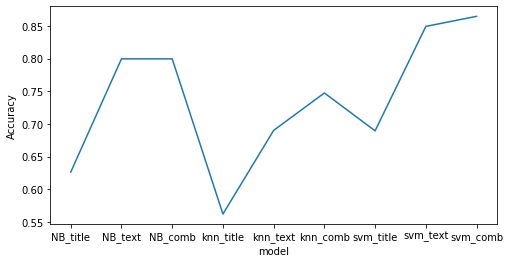

In [73]:
acc = [acc_NB_title, acc_NB_text, acc_NB_comb, acc_knn_title, acc_knn_text, acc_knn_comb, acc_svm_title, acc_svm_text, acc_svm_comb]
labels = ['NB_title', 'NB_text', 'NB_comb', 'knn_title', 'knn_text', 'knn_comb', 'svm_title', 'svm_text', 'svm_comb']
plt.figure(figsize=(8, 4));
plt.plot(labels, acc);
plt.xlabel('model');
plt.ylabel('Accuracy');
plt.show();

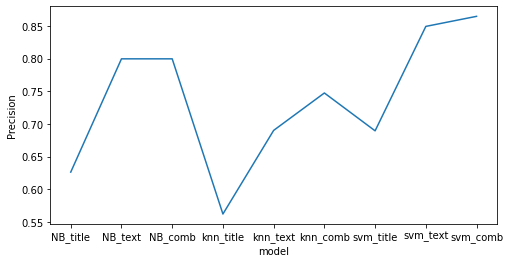

In [74]:
pres = [pres_NB_title, pres_NB_text, pres_NB_comb, pres_knn_title, pres_knn_text, pres_knn_comb, pres_svm_title, pres_svm_text, pres_svm_comb]
labels = ['NB_title', 'NB_text', 'NB_comb', 'knn_title', 'knn_text', 'knn_comb', 'svm_title', 'svm_text', 'svm_comb']
plt.figure(figsize=(8, 4));
plt.plot(labels, pres);
plt.xlabel('model');
plt.ylabel('Precision');
plt.show();

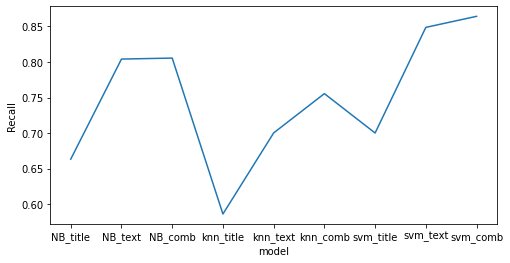

In [75]:
recall = [recall_NB_title, recall_NB_text, recall_NB_comb, recall_knn_title, recall_knn_text, recall_knn_comb, recall_svm_title, recall_svm_text, recall_svm_comb]
labels = ['NB_title', 'NB_text', 'NB_comb', 'knn_title', 'knn_text', 'knn_comb', 'svm_title', 'svm_text', 'svm_comb']
plt.figure(figsize=(8, 4));
plt.plot(labels, recall);
plt.xlabel('model');
plt.ylabel('Recall');
plt.show();

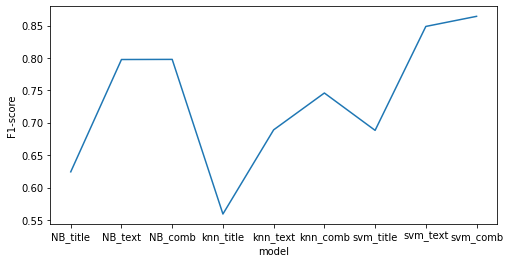

In [76]:
f1 = [f1_NB_title, f1_NB_text, f1_NB_comb, f1_knn_title, f1_knn_text, f1_knn_comb, f1_svm_title, f1_svm_text, f1_svm_comb]
labels = ['NB_title', 'NB_text', 'NB_comb', 'knn_title', 'knn_text', 'knn_comb', 'svm_title', 'svm_text', 'svm_comb']
plt.figure(figsize=(8, 4));
plt.plot(labels, f1);
plt.xlabel('model');
plt.ylabel('F1-score');
plt.show();

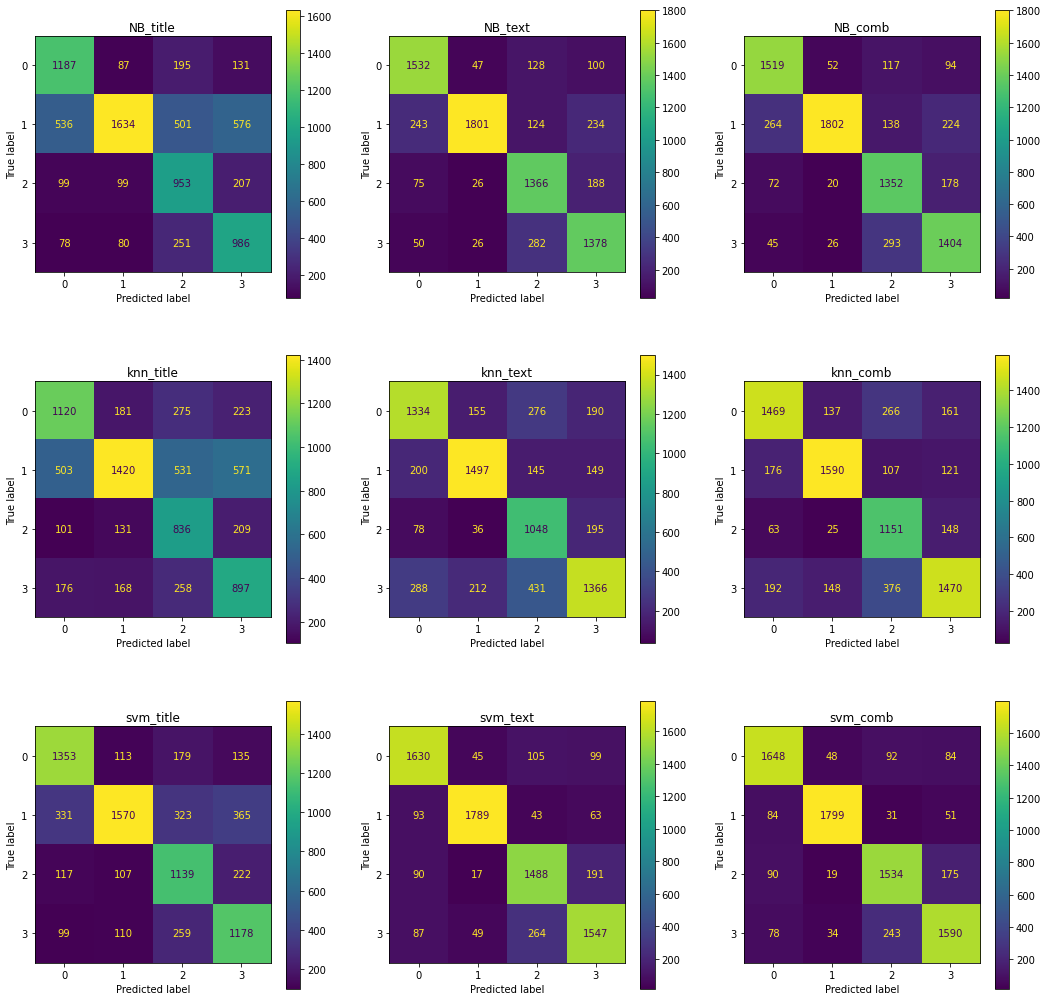

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_mat = [conf_mat_NB_title, conf_mat_NB_text, conf_mat_NB_comb, conf_mat_knn_title, conf_mat_knn_text, conf_mat_knn_comb, conf_mat_svm_title, conf_mat_svm_text, conf_mat_svm_comb]
labels = ['NB_title', 'NB_text', 'NB_comb', 'knn_title', 'knn_text', 'knn_comb', 'svm_title', 'svm_text', 'svm_comb']
fig, axes = plt.subplots(3,3, figsize=(18,18))
for i in range(3):
    for j in range(3):
        disp = ConfusionMatrixDisplay(conf_mat[3 * i + j])
        axes[i][j].set_title(labels[3 * i + j])
        disp.plot(ax=axes[i][j])
plt.show();

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>مصورسازی (10 نمره امتیازی)</h3>
در این قسمت با استفاده از روش‌های کاهش ابعاد مانند PCA یا t-SNE داده‌های دیتاست را به یک فضایی با ابعاد پایین‌تر (2 یا 3 بعد) برده و سپس با استفاده از کتابخانه‌های مصورسازی پایتون، نمودارهای مرتبط به هر مدل را رسم نمایید. <br>
هیچ محدودیتی برای استفاده از کتابخانه های پایتون در این بخش وجود ندارد. همچنین هر نوع نمودار مرتبط و دارای محتوای قابل قبول، برای این بخش کافی می باشد. 
</font>
</div>

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

decomposed_title_data_TSNE = tsne.fit_transform(np_train_title_vecs)

decomposed_text_data_TSNE = tsne.fit_transform(np_train_text_vecs)

decomposed_comb_data_TSNE = tsne.fit_transform(np_train_comb_vecs)

Text(0.5, 1.0, 'comb')

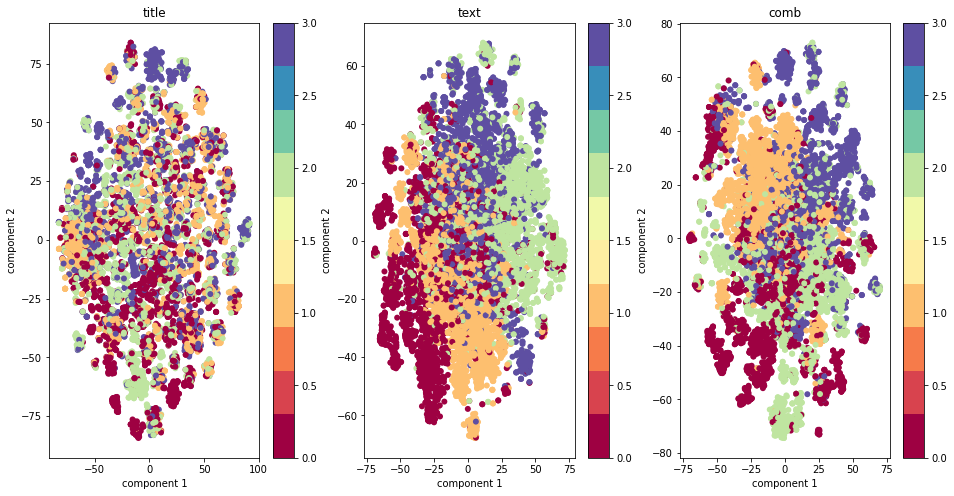

In [22]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.scatter(decomposed_title_data_TSNE[:, 0], decomposed_title_data_TSNE[:, 1],
            c=np_train_labels, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10, ))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title("title")

plt.subplot(1, 3, 2)
plt.scatter(decomposed_text_data_TSNE[:, 0], decomposed_text_data_TSNE[:, 1],
            c=np_train_labels, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10, ))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title("text")

plt.subplot(1, 3, 3)
plt.scatter(decomposed_comb_data_TSNE[:, 0], decomposed_comb_data_TSNE[:, 1],
            c=np_train_labels, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10, ))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.title("comb")


<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>خوشه‌بندی (20+10 نمره)</h2>
در این بخش می‌خواهیم دو مدل خوشه‌بندی k-means و Agglomerative Clustering را بررسی کنیم. خوشه‌بندی بر روی برچسب (label) هر خبر اجرا می‌شود. برای این قسمت، مرحله آموزش بر روی داده‌های آموزش انجام می‌شود و با استفاده از معیار purity، اعتبارسنجی روی داده‌های validation انجام می‌گردد. درنهایت نیز، مشابه قسمت طبقه‌بندی، به سنجش مدل روی داده تست می‌پردازیم. <br>
به همین منظور کد مربوط به محاسبه معیار purity را از ابتدا در این قسمت پیاده‌سازی کنید.
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    توجه داشته باشید که مانند بخش طبقه‌بندی، لازم است که در انتها 6 مدل به عنوان مدل‌های نهایی برای بخش ارزیابی انتخاب شوند. این 6 مدل به صورت زیر می‌باشند:
    <ul>
        <li>مدل k-means آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
        <li>مدل k-means آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
        <li>مدل k-means آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_1 یا embedding حاصل از عنوان خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_2 یا embedding حاصل از متن خبر</li>
        <li>مدل Agglomerative Clustering آموزش داده شده روی ستون vec_3 یا embedding حاصل از ترکیب عنوان و متن خبر</li>
    </ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم K-means (8 نمره)</h3>
الگوریتم k-means را از ابتدا پیاده‌سازی کنید و سپس آن را روی داده train، آموزش داده و با داده validation اعتبارسنجی (با استفاده از معیار purity) نمایید. تعداد خوشه‌ها برابر مقدار 4 در نظر گرفته‌شود. 
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>الگوریتم Agglomerative Clustering (6 نمره)</h3>
با استفاده از الگوریتم Agglomerative Clustering (که یک الگوریتم خوشه‌بندی از نوع hierarchical می‌باشد)  به خوشه‌بندی داده‌های دیتاست بپردازید. لازم به ذکر است که از کتابخانه sklearn برای پیاده‌سازی این قسمت می‌توانید استفاده کنید. 
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>ارزیابی (6 نمره)</h3>
با استفاده از معیارهای ارزیابی purity (که در ابتدای این بخش پیاده‌سازی شده بود) و معیار Adjusted Rand Index (پیاده‌سازی با استفاده از کتابخانه‌های پایتون) به سنجش عملکرد مدل‌های انتخاب شده بر روی داده تست بپردازید. 
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h3>مصورسازی (10 نمره امتیازی)</h3>
مشابه بخش قبل، با استفاده از روش‌های کاهش ابعاد مانند PCA یا t-SNE داده‌های دیتاست را به یک فضایی با ابعاد پایین‌تر (2 یا 3 بعد) برده و سپس با استفاده از کتابخانه‌های مصورسازی پایتون، نمودارهای مرتبط را رسم نمایید. <br>
هیچ محدودیتی برای استفاده از کتابخانه‌های پایتون در این بخش، وجود ندارد. همچنین هر نوع نمودار مرتبط و دارای محتوای قابل قبول، برای این بخش کافی می‌باشد. 
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>پیاده‌سازی خزنده (crawler) و واکشی اطلاعات (40 نمره)</h1>
    در این بخش قصد داریم تا برای سایت  ResearchGate یک خزنده پیاده‌سازی کرده و با استفاده از آن اطلاعات تعدادی مقاله را واکشی کنیم. <br>
    اطلاعات مورد نیاز برای جمع‌آوری از هر مقاله، عبارت‌اند از:
<ul>
      <li>ID مقاله</li>
      <li>عنوان مقاله</li>
      <li>چکیده مقاله (برخی از مقالات ممکن است دارای چکیده نباشند. همچنین ممکن است در برخی از صفحات سایت، به جای عبارت Abstract، از عبارت Description برای اشاره به چکیده استفاده‌شده باشد. توصیه می‌کنیم که برخی از صفحات این سایت را بررسی کنید.)
</li>
      <li>سال انتشار</li>
    <li>نام نویسندگان</li>
    <li>لینک صفحه ارجاعات مقاله یا references (10 مورد اول - در صورت موجود نبودن، همان تعداد)</li>
</ul>
برای آغاز واکشی به چند لینک اولیه نیاز است. این لینک‌ها در فایل start.txt قرار دارند. در طول واکشی اطلاعات، لازم است که لینک‌های ارجاعات مقاله (reference) به همین فایل start.txt اضافه شده و برای واکشی‌های بعدی مورداستفاده قرار گیرد. توجه داشته باشید که لینک‌های ذخیره‌شده نباید تکراری باشند. <br>
اطلاعات واکشی شده باید به‌صورت یک فایل json ذخیره شوند. یک نمونه از قالب این فایل در sample.json قرار داده‌شده است. در کل نیاز است که 2000 مقاله واکشی شوند و اطلاعات آن‌ها در یک فایل json با قالب گفته ذخیره گردد. <br><br>
<b>نکات مهم:</b>
    <ul>
        <li>پیشنهاد می‌شود که از کتابخانه‌های selenium و یا scrapy زبان پایتون برای crawl کردن و از کتابخانه CSS Selector برای جستجو و دسترسی به تگ‌های HTML صفحه و محتوای آن‌ها استفاده کنید.
</li>
        <li>برای واکشی اطلاعات، بین هر واکشی یک مقدار delay (برای مثال 5 ثانیه) قرار دهید.</li>
        <li>توجه داشته باشید که فرمت URL هر صفحه در سایت ResearchGate به‌صورت زیر است:
        <div dir='ltr'>
            https://www.researchgate.net/publication/PaperId_PaperTitle
        </div>
        که PaperID و PaperTitle، Id و عنوان مقاله می‌باشند.
        </li>
        <li>برای دسترسی به بخش ارجاعات مقاله، لازم است که عبارت references/ به انتهای URL مقاله اضافه شود و سپس واکشی انجام شود.
</li>
    </ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h1>ارزش‌گذاری مقالات و رتبه‌بندی نویسنده‌ها (10 + 10 نمره)</h1>
    <h2>ارزش‌گذاری مقالات با الگوریتم PageRank (10 نمره)</h2>
    در این قسمت شما باید مقدار PageRank مقالات واکشی شده را که در فایل json کراول شده است و حاوی ۲۰۰۰ مقاله است، محاسبه کرده و یک فایل با نام PageRank.json با فرمت زیر ذخیره کنید.
      <div dir="ltr">
            <pre class="line-numbers">
               <code class="language-css">
{
    &ltPaperID1&gt: &ltPageRankValue1&gt,
    &ltPaperID2&gt: &ltPageRankValue2&gt,
    .
    .
    .
}
               </code>
            </pre>
      </div> 
    <b>ورودی</b>
    <ul>
        <li>فایل json حاوی مقالات کراول شده</li>
        <li>مقدار alpha یا teleporting parameter</li>
    </ul>  
    <b>خروجی</b>
    <ul>
        <li>فایل PageRank.json </li>
    </ul>
</font>
</div>

<div align= "justify" dir="rtl">
<font face="Calibri" size=4>
    <h2>رتبه‌بندی نویسنده‌ها با الگوریتم HITS (10 نمره امتیازی)</h2>
    حال که ارجاع میان مقالات را مورد بررسی قرار دادیم می خواهیم به رتبه‌بندی نویسندگان مقاله بر اساس HITS بپردازیم. میگوییم فرد الف به فرد ب ارجاع دارد اگر فرد الف مقاله ای نوشته باشد که به مقاله ای از فرد ب ارجاع پیدا کرده باشد. در این حالت یک یال از فرد الف به فرد ب در گراف مدل نویسندگان رسم می‌کنیم. <br>
    حال با تعریف ذکر شده با محاسبه شاخص authority , hub نویسندگان را بر اساس authority رتبه بندی کنید. <br> 
    <b>ورودی</b>
    <ul>
        <li>فایل json حاوی ۲۰۰۰ مقاله </li>
        <li>تعداد نویسندگان برتر مورد نظر(n)</li>
    </ul>  
    <b>خروجی</b>
    <ul>
        <li>لیست n نویسنده برتر  </li>
    </ul>
    برای پیاده سازی HITS برای تعداد دفعات اجرای حلقه می‌توانید عدد ۶ را در نظر بگیرید.
</font>
</div>